# Reveiwing dataset 

In reviewing the dataset, we've identified columns that appear to be irrelevant for our analysis. The columns "Message ID," "Message timestamp," "Message date," and "Message time" seem to hold information related to when the data is entered, which is not crucial for our purposes.

Additionally, columns such as "Start time," "Start time," "End time," "End time," and "Catch area" will be replaced with a consolidated "Duration" column. However, we acknowledge that the time of day might still be relevant for understanding fish behavior.

We've opted to use "Location start" and "Location stop" instead of "Main area start," "Main area end," "Main area start (code)," and "Main area end (code)" since all these columns seem to be interconnected.

Upon further examination, we noticed that "Location start (code)" and "Location stop (code)" contained numerous empty fields. To address this, we recommend using start position latitude/longitude and stop position latitude/longitude, which should provide more meaningful data compared to the (code) fields, likely resulting in higher precision.

Another issue arises with the "Bruttotonnasje" column, where a significant number (approximately 230,000) of entries are missing. Consequently, we have decided to drop both "Gross tonnage" columns in favor of relying on boat length and width, which offer more comprehensive information.

Similarly, we are simplifying the dataset by using only the "Vessel length" column instead of both 'Length group' and 'Length group (code)'. Although this may introduce some complexity in categorizing various vessel types, it should contribute to better precision in our analysis.

Finally, to streamline the data further, we have chosen to focus on the "Art FAO" column, removing all other species types for a more targeted and manageable dataset.

In [1]:
#Hvilke kolonner er irrelevante?
#"Melding ID", "Meldingstidpunkt", "Meldingsdato", "Meldingsklokkeslett" Det meste med når dette er lagt inn vil ikke ha noe å si.
#"Starttidpunkt", "Startklokkeslett", "Stopptidspunkt", "Stoppklokkeslett", "Fangstår" Vil erstattes med bare "Varighet", men kanskje har noe å si med åssen fisken oppfører seg natt/dag.
#"Hovedområde start", "Hovedområde stopp", "Hovedområde start (kode)", "Hovedområde stopp (kode)" Bruker heller Lokasjon stopp og start ettersom alle de ser ut til å være tilknyttet.
"""
Når det i tillegg sjekket for NaN lenger nede i koden, ser man at "Lokasjon start (kode)" og "Lokasjon stopp (kode)" hadde flere tomme felter. Derfor vil
det være mer gunstig og bruke startposisjon bredde/lengde og samme med stopp. Dette vil gir mer data enn å bruke (kode), men vil trolig og gi en høyere 
presisjon.
"""
#Problem med også "Bruttotonnasje" med veldig mange(ca 230000) NaN derfor droppe begge "Bruttotonnasje", ettersom vi har mange fler med båt lengde og bredde.
#Eksempelhvis samme med 'Lengdegruppe' og 'Lengdegruppe (kode)' brukes bare 'Fartøylengde'. Kan gi flere ulike farttøy som blir mer komplisert data, men bidra bedre presisjon
#Alt av unødvendig art, vi valgte Art FAO og fjernet alle andre art typer.


'\nNår det i tillegg sjekket for NaN lenger nede i koden, ser man at "Lokasjon start (kode)" og "Lokasjon stopp (kode)" hadde flere tomme felter. Derfor vil\ndet være mer gunstig og bruke startposisjon bredde/lengde og samme med stopp. Dette vil gir mer data enn å bruke (kode), men vil trolig og gi en høyere \npresisjon.\n'

# Impoting and reading 
Reading and printing out the first 5 lines 
Using sep=';' because in the csv file it is split with ";"

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv', sep=';')
df.head()

/var/folders/kw/2mf6m7dx0pn9xqtnjjs396700000gn/T/ipykernel_14546/3290870213.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),...,Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,...,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


# Checking for NaN (Missing Values):

When we check for NaN values we can se the context between the colons. With this knowlage we can easaly see if we should drop the rows with NaN. We also see what colons that are worth using

In [3]:

nan_count = df.isna().sum()

print(nan_count)

#Defining irrelevant colons so they are easier to manage and delte if needed 
irrelevante_col = ['Melding ID', 'Meldingstidspunkt', 'Meldingsdato', 'Meldingsklokkeslett','Starttidspunkt', 'Startklokkeslett', 'Stoppdato',
                   'Stopptidspunkt', 'Stoppklokkeslett','Hovedområde start', 'Hovedområde stopp', 'Hovedområde start (kode)', 'Fangstår',
                   'Hovedområde stopp (kode)', 'Lokasjon start (kode)', 'Lokasjon stopp (kode)', 'Bruttotonnasje 1969', 'Bruttotonnasje annen',
                   'Lengdegruppe (kode)', 'Lengdegruppe', 'Hovedart FAO (kode)', 'Hovedart FAO', 'Hovedart - FDIR (kode)', 'Art FAO (kode)', 
                   'Art - FDIR (kode)', 'Art FAO', 'Art - gruppe (kode)', 'Art - gruppe', 'Redskap FAO (kode)', 'Redskap FAO', 'Redskap FDIR']



Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redskap FDIR (kode)            188
Redskap FDIR        

# Removing Colums 

#Removing the coloms that are unneceasrry with pandas drop 
Using a loop, you iterate through the list of irrelevant columns and drop them from the DataFrame(df). The axis=1 parameter indicates that you are dropping columns.


#Dropper NaN istede for eksmepelhvis å erstatte mean ettersom ikke bruke mean på eksempel hvis redskap og koder
#Vi dropper også NaN fordi er mindre enn 5000 NaN av resterende kolonner, og vi vil heller ha en klarere data

In [4]:
for col in irrelevante_col:
     df = df.drop(col, axis=1)

#Dropping Rows with NaN     
df.dropna()
#Displaying the First 5 Rows
df.head()

,Startdato,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Art - FDIR,Rundvekt,Bredde,Fartøylengde
0,31.12.2017,"-60,35","-46,133",-2740,1440,"-60,4","-46,15",-805,5649.0,53.0,Antarktisk krill,706714.0,"19,87","133,88"
1,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,9594.0,"12,6","56,8"
2,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Torsk,8510.0,"12,6","56,8"
3,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Blåkveite,196.0,"12,6","56,8"
4,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Sei,134.0,"12,6","56,8"


# Why are we dropping 

It's worth noting that dropping rows with NaN values might lead to a loss of data. We have consider other methods, such as filling NaNs with mean, median, or a specific value, depending on the nature of the data. But we chose to remove them. 

The code drops columns using irrelevante_col to streamline the dataset for analysis. Columns are removed if they are irrelevant, have many missing values, contain redundant information, or exhibit inconsistencies. The decision is tailored to the analysis goals, aiming for a cleaner dataset that meets specific requirements and enhances overall data quality.

# Visulization of NaN values 

We are cleaning and preparing the data for it to be used. Here is a visulasation of a bar chart that visually represents the impact of dropping rows with missing values (NaN) in our DataFrame. 
We see that the count of missing values significantly decreases after dropping rows, it indicates that this operation is effective in reducing missing data. If there was not a masjor change it can be considered effective in maintaining data integrity. But as we can see it was amsrat move. 
Dropping rows can also be computationally efficient, especially our dataset is large and the proportion of rows with missing values is relatively small. So even of there was a lot of data that is not used now it is a small amount compared to the whole dataset. 
Of couse dropping values and its outcome depends on the dataset but considering this exaple we thought the smartest move was to remove to remove the values. 

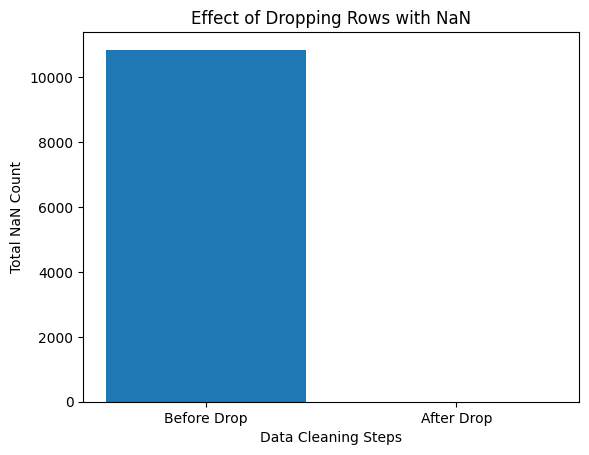

In [5]:
import matplotlib.pyplot as plt

# Get NaN counts before and after dropping rows
initial_nan_count = df.isna().sum()
df.dropna(inplace=True)
final_nan_count = df.isna().sum()

# Plot the counts
plt.bar(['Before Drop', 'After Drop'], [initial_nan_count.sum(), final_nan_count.sum()])
plt.xlabel('Data Cleaning Steps')
plt.ylabel('Total NaN Count')
plt.title('Effect of Dropping Rows with NaN')
plt.show()


Calculating and printing the count of occurrences for each unique value in the 'Art - FDIR' column of the DataFrame. It helps provide insights into the distribution of different values within that specific column.

In [6]:
counts = df['Art - FDIR'].value_counts()

print(counts)

Art - FDIR
Torsk                  56507
Sei                    42495
Hyse                   39080
Lange                  17328
Uer (vanlig)           14151
                       ...  
Sagtang                    1
Annen makrell              1
Blåhval                    1
Annen laksefisk            1
Bukstripet pelamide        1
Name: count, Length: 121, dtype: int64


Filtering the DataFrame (df) to include only rows where the value in the 'Art - FDIR' column is either 'Torsk' or 'Sei'.

In [7]:
df = df[(df['Art - FDIR'] == 'Torsk') | (df['Art - FDIR'] == 'Sei')]
df.head()

,Startdato,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Art - FDIR,Rundvekt,Bredde,Fartøylengde
2,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Torsk,8510.0,"12,6","56,8"
4,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Sei,134.0,"12,6","56,8"
6,31.12.2017,"74,91","15,868",-403,267,"74,901","16,248",-277,11096.0,51.0,Torsk,6651.0,"12,6","56,8"
9,31.12.2017,"74,91","15,868",-403,267,"74,901","16,248",-277,11096.0,51.0,Sei,67.0,"12,6","56,8"
12,31.12.2017,"74,883","16,056",-346,315,"74,924","15,742",-496,10215.0,51.0,Torsk,5097.0,"12,6","56,8"


Preprocessing specific columns in the DataFrame, converting them to strings, replacing commas with dots, converting them back to float, and mapping categorical values to numerical ones. This prepares the data for further analysis, ensuring the appropriate data types and formats are applied.

In [8]:
float_columns = ['Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Varighet',
                'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 'Redskap FDIR (kode)', 
                'Rundvekt', 'Bredde', 'Fartøylengde'] 
# Convert the relevant columns to string
df[float_columns] = df[float_columns].astype(str)

# Replace , with . for all float columns
for col in float_columns:
    df[col] = df[col].str.replace(',', '.')

# Convert the columns back to float
df[float_columns] = df[float_columns].astype(float)
mapping = {'Torsk':  0, 'Sei':  1}
df['Art - FDIR'] = df['Art - FDIR'].map(mapping)
df.head()



,Startdato,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Art - FDIR,Rundvekt,Bredde,Fartøylengde
2,30.12.2017,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,0,8510.0,12.6,56.8
4,30.12.2017,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,1,134.0,12.6,56.8
6,31.12.2017,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,0,6651.0,12.6,56.8
9,31.12.2017,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,1,67.0,12.6,56.8
12,31.12.2017,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,0,5097.0,12.6,56.8


Transforms the date information in the 'Startdato' column into a more useful format (numeric month values) and creates a new 'Month' column. It then drops the original date column, potentially to streamline the dataset or for other reasons depending on the specific analysis goals.

In [9]:
#The dates are changed into values for each season so they can be used 
#We are now able to use all the coloms in stead of using our defines features and adding there
df['Startdato'] = pd.to_datetime(df['Startdato'], format='%d.%m.%Y')
df['Month'] = df['Startdato'].dt.month
df.drop('Startdato', axis=1)

,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month
2,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,0,8510.0,12.6,56.8,12
4,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,1,134.0,12.6,56.8,12
6,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,0,6651.0,12.6,56.8,12
9,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,1,67.0,12.6,56.8,12
12,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,0,5097.0,12.6,56.8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305408,76.509,14.295,-193.0,301.0,76.431,14.679,-341.0,13284.0,51.0,0,3126.0,12.6,57.3,12
305413,76.509,14.295,-193.0,301.0,76.431,14.679,-341.0,13284.0,51.0,1,32.0,12.6,57.3,12
305416,76.385,14.932,-244.0,345.0,76.640,13.642,-299.0,44035.0,51.0,0,3452.0,12.6,57.3,12
305422,76.606,13.800,-280.0,328.0,76.899,12.820,-289.0,41216.0,51.0,0,5902.0,12.6,57.3,12
